In [1]:
import pandas as pd
import numpy as np
import re 
from scipy import stats  


In [3]:
df = pd.read_csv('novo_arquivo.csv')


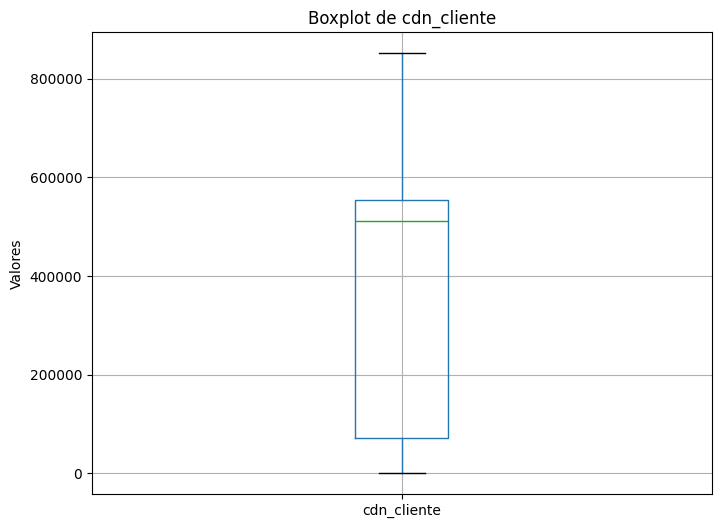

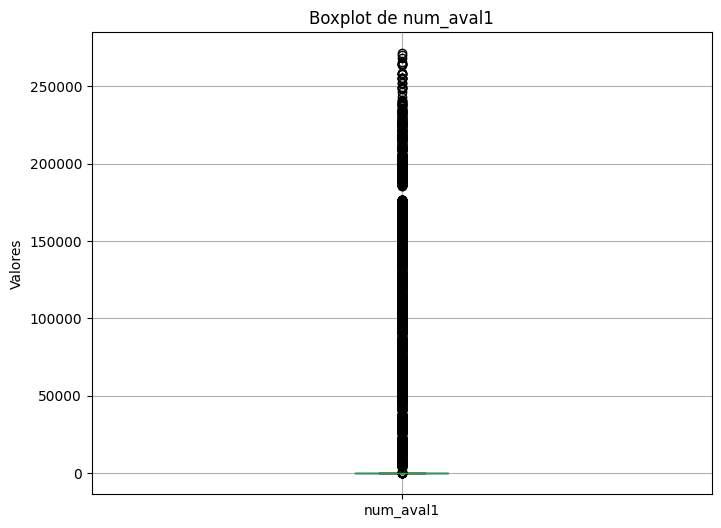

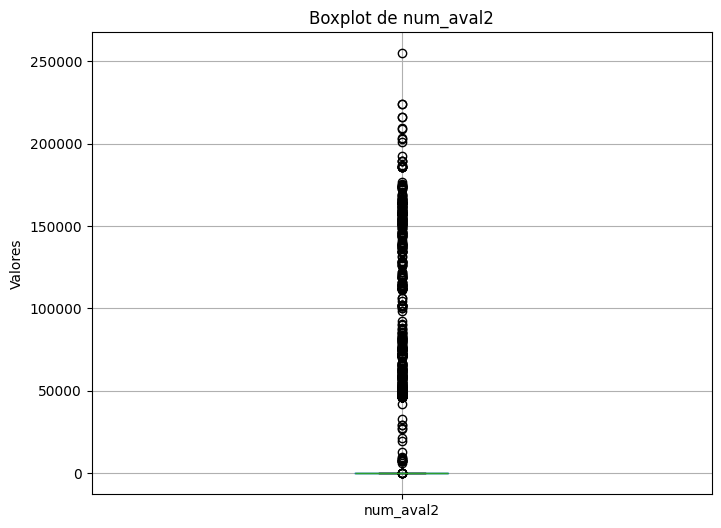

KeyError: "None of [Index(['dt_inscricao'], dtype='object')] are in the [columns]"

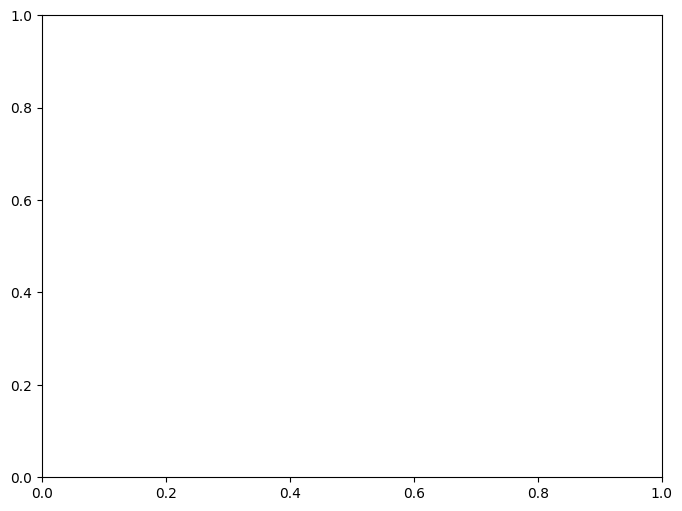

In [2]:
import matplotlib.pyplot as plt

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('novo_arquivo.csv')

# Criar boxplot para cada coluna
for column in df.columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel('Valores')
    plt.show()


In [12]:
z_scores = np.abs(stats.zscore(df['num_aval1'])) # calcula o z-score para cada valor numérico no dataset
limiar = 3 # define um limiar para identificar outliers
dados_sem_outliers = df[(z_scores < limiar).all(axis=1)]

ValueError: No axis named 1 for object type Series

In [7]:
df['situacao'].unique()

array(['Ativo', 'Inativo', nan], dtype=object)

In [9]:
df['situacao'].value_counts()

situacao
Inativo    101063
Ativo       38255
Name: count, dtype: int64

In [4]:
teste =df['situacao'].dropna()

In [5]:
teste

0           Ativo
1         Inativo
2           Ativo
3           Ativo
4           Ativo
           ...   
139582    Inativo
139583    Inativo
139584    Inativo
139585    Inativo
139586    Inativo
Name: situacao, Length: 139318, dtype: object

In [8]:
nullteste = teste.isnull().sum()
print(nullteste)

0


In [5]:
null = df.isnull().sum()
print(null)

cdn_cliente                   0
num_aval1                     0
num_aval2                     0
dt_inscricao                  0
l_cpf                         0
estrutura                    61
Bloqueado                     0
log_ativo                     0
mot_ativo                 84932
cdn_repres                    0
dat_usuario                   0
origem                        0
cdn_grupo_cliente             0
tipo_produtor             79540
safra_crm                 29280
dt_implant_ini                0
cliente_novo                  0
dt_ult_movto                  0
safra_ult_movto           65180
situacao                    269
cliente_foco                  0
log-utiliza-portal            0
data-ativacao                 0
data-inativacao               0
log_ativo_pa                  0
log_cliente_pet               0
cod_rep_secundario            0
apl_classif_produtor      13344
apl_dt_valid_classif          0
cod_transp                    0
log_participante_bayer        0
log_coop

In [58]:
import pandas as pd
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Defina a frequência de corte e a ordem do filtro
cutoff_freq = 1000  # Frequência de corte em Hz
order = 6           # Ordem do filtro

# Simule um DataFrame de exemplo
numeric_columns = df.select_dtypes(include=[np.number]).columns


# Aplicar o filtro passa-baixa em todas as colunas do DataFrame
for column in numeric_columns:
    df[column] = butter_lowpass_filter(df[column], cutoff_freq/(2*fs), fs=1000, order=order) # Normalizando a frequência de corte

print(df)


          cdn_cliente      num_aval1      num_aval2 dt_inscricao  l_cpf  \
0       6.612684e+119 -7.596405e+118 -6.227859e+117   1999-11-01  False   
1       6.644578e+119 -7.591827e+118 -6.233627e+117   1996-03-01  False   
2       6.676362e+119 -7.587204e+118 -6.239339e+117   1996-01-24  False   
3       6.708036e+119 -7.582533e+118 -6.244995e+117   1996-03-04  False   
4       6.739600e+119 -7.577817e+118 -6.250593e+117   1996-01-24  False   
...               ...            ...            ...          ...    ...   
139582  -1.792581e+61   1.661852e+60   1.518248e+59   2024-02-27  False   
139583  -1.792581e+61   1.661852e+60   1.518248e+59   2024-02-27  False   
139584  -1.792581e+61   1.661852e+60   1.518248e+59   2024-02-27  False   
139585  -1.792581e+61   1.661852e+60   1.518248e+59   2024-02-27  False   
139586  -1.792581e+61   1.661852e+60   1.518248e+59   2024-02-27  False   

       estrutura  Bloqueado  log_ativo                   mot_ativo  \
0          Médio      False  

array([-2.24704713e-07, -1.37967797e-06,  1.01962462e-05,  1.82517283e-04,
        1.28362765e-03,  5.94230736e-03,  2.07099469e-02,  5.79158149e-02,
        1.34949021e-01,  2.68530631e-01,  4.63977349e-01,  7.03659880e-01,
        9.41955946e-01,  1.11298979e+00,  1.15169971e+00,  1.02093516e+00,
        7.31938764e-01,  3.46484798e-01, -4.33496461e-02, -3.50708181e-01,
       -5.28968586e-01, -5.89160894e-01, -5.90370365e-01, -6.06984523e-01,
       -6.88700301e-01, -8.33337675e-01, -9.86176320e-01, -1.06604003e+00,
       -1.00487024e+00, -7.81015485e-01, -4.30073824e-01, -2.88106849e-02,
        3.38642409e-01,  6.14452984e-01,  7.83579112e-01,  8.65866145e-01,
        8.90091515e-01,  8.66244732e-01,  7.73155717e-01,  5.69756140e-01,
        2.24554953e-01, -2.53124185e-01, -7.98698213e-01, -1.30493407e+00,
       -1.65755610e+00, -1.77735522e+00, -1.64864632e+00, -1.32093141e+00,
       -8.84230107e-01, -4.31310630e-01, -2.54528419e-02,  3.11944842e-01,
        5.90850294e-01,  

In [52]:
df['num_aval1']


[0. 0. 0. ... 0. 0. 0.]


In [48]:
import re
from scipy.signal import savgol_filter
from typing import List

def _clean_data(data_to_clean: pd.DataFrame, columns:List[str]) -> pd.DataFrame:
    for column in columns:
        try:
            # Removendo linhas com valores ausentes na coluna atual

            # Removendo caracteres especiais da coluna atual
            data_to_clean[column] = data_to_clean[column].apply(lambda x: re.sub(r'[!@#$%¨&*(){}\[\]]', '', str(x)) if not isinstance(x, bool) else x)

            # Aplicando Savitzky-Golay filter se a coluna for numérica
            if pd.api.types.is_numeric_dtype(data_to_clean[column]):
                data_to_clean[column] = savgol_filter(data_to_clean[column], 5, 2) #aplicando filtro de dados ruidosos

        except Exception as e:
            print(data_to_clean[column].name)
            print(e)
            continue

    return data_to_clean

# Supondo que 'df' é o seu DataFrame
df_cleaned = _clean_data(df, df.columns.to_list())


In [39]:
df.dropna()

,cdn_cliente,num_aval1,num_aval2,dt_inscricao,l_cpf,estrutura,Bloqueado,log_ativo,mot_ativo,cdn_repres,...,data-ativacao,data-inativacao,log_ativo_pa,log_cliente_pet,cod_rep_secundario,apl_classif_produtor,apl_dt_valid_classif,cod_transp,log_participante_bayer,log_cooperativa
0,1,0,0,1999-11-01,False,Médio,False,True,COOP Nº 6502 - 23/07/2009,35006,...,2015-12-10,null,True,True,19069,1.0,9999-12-31,71214,False,False
1,2,0,0,1996-03-01,False,Mini,False,True,nan,28000,...,null,null,False,False,0,1.0,9999-12-31,71215,False,False
2,3,0,0,1996-01-24,False,Grande1,False,True,nan,20000,...,null,null,False,False,0,1.0,9999-12-31,48549,False,False
3,4,0,0,1996-03-04,False,Grande1,False,True,nan,49010,...,2015-09-29,null,True,False,0,50.0,9999-12-31,1241,False,False
4,5,0,0,1996-01-24,False,Grande1,False,True,nan,23100,...,null,null,False,False,0,1.0,9999-12-31,71216,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139576,576103,0,0,2024-02-27,False,MINI,False,True,nan,5008,...,null,null,False,False,0,0.0,9999-12-31,0,False,False
139581,576109,0,0,2024-02-27,False,MINI,False,True,nan,73000,...,null,null,False,False,0,0.0,9999-12-31,0,False,False
139582,576105,0,0,2024-02-27,False,PEQUENO,False,True,nan,13014,...,null,null,False,False,0,0.0,9999-12-31,0,False,False
139583,576108,0,0,2024-02-27,False,MINI,False,True,nan,16000,...,null,null,False,False,0,0.0,9999-12-31,0,False,False


TypeError: expected string or bytes-like object, got 'Series'

In [28]:
data['data-inativacao'].dropna()  

0         (null)
1         (null)
2         (null)
3         (null)
4         (null)
           ...  
139582    (null)
139583    (null)
139584    (null)
139585    (null)
139586    (null)
Name: data-inativacao, Length: 139587, dtype: object

In [26]:
data['situacao'].count()

139318

In [19]:
data['situacao'] = data['situacao'].drop_duplicates(keep='last')

In [20]:
data['situacao'].count()

2

In [7]:
data2 = data.dropna(subset=['situacao'])

In [9]:
data2['situacao'].count()

139318

In [4]:
unique_values = data['situacao'].unique()
print(unique_values)
139318

['Ativo' 'Inativo' nan]


In [5]:
data

,cdn_cliente,num_aval1,num_aval2,dt_inscricao,l_cpf,estrutura,Bloqueado,log_ativo,mot_ativo,cdn_repres,...,data-ativacao,data-inativacao,log_ativo_pa,log_cliente_pet,cod_rep_secundario,apl_classif_produtor,apl_dt_valid_classif,cod_transp,log_participante_bayer,log_cooperativa
0,1,0,0,1999-11-01,False,Médio,False,True,COOP Nº 6502 - 23/07/2009,35006,...,2015-12-10,(null),True,True,19069,1.0,9999-12-31,71214,False,False
1,2,0,0,1996-03-01,False,Mini,False,True,NaN,28000,...,(null),(null),False,False,0,1.0,9999-12-31,71215,False,False
2,3,0,0,1996-01-24,False,Grande1,False,True,NaN,20000,...,(null),(null),False,False,0,1.0,9999-12-31,48549,False,False
3,4,0,0,1996-03-04,False,Grande1,False,True,NaN,49010,...,2015-09-29,(null),True,False,0,50.0,9999-12-31,1241,False,False
4,5,0,0,1996-01-24,False,Grande1,False,True,NaN,23100,...,(null),(null),False,False,0,1.0,9999-12-31,71216,False,False
